## Loading data

In [1]:
from collections import Counter

In [2]:
import pandas as pd
tweets = pd.read_csv('data/TweetsCOV19.csv')
tweets.rename(columns={"TweetText": "x"}, inplace=True)
tweets['x'] = tweets['x'].astype(str)
tweets.dropna(subset=["Sentiment"], inplace=True)
tweets['UserLocation'] = tweets['UserLocation'].fillna("unknown")
tweets[['pos','neg']] = tweets['Sentiment'].str.split(" ", expand=True)
tweets["strat"] = tweets['pos'].astype(int) + tweets['neg'].astype(int) #+";"+ pd.to_datetime(tweets["Timestamp"]).dt.month.astype(str)

/tmp/ipykernel_37506/2685664935.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv('data/TweetsCOV19.csv')


## Preprocessing code

In [3]:
emoticons = {
    ':*': '<kiss>',
    ':-*': '<kiss>',
    ':x': '<kiss>',
    ':-)': '<happy>',
    ':-))': '<happy>',
    ':-)))': '<happy>',
    ':-))))': '<happy>',
    ':-)))))': '<happy>',
    ':-))))))': '<happy>',
    ':)': '<happy>',
    ':))': '<happy>',
    ':)))': '<happy>',
    ':))))': '<happy>',
    ':)))))': '<happy>',
    ':))))))': '<happy>',
    ':)))))))': '<happy>',
    ':o)': '<happy>',
    ':]': '<happy>',
    ':3': '<happy>',
    ':c)': '<happy>',
    ':>': '<happy>',
    '=]': '<happy>',
    '8)': '<happy>',
    '=)': '<happy>',
    ':}': '<happy>',
    ':^)': '<happy>',
    '|;-)': '<happy>',
    ":'-)": '<happy>',
    ":')": '<happy>',
    '\\o/': '<happy>',
    '\\0/': '<happy>',
    ':-d': '<laugh>',
    ':d': '<laugh>',
    '8-d': '<laugh>',
    '8d': '<laugh>',
    'x-d': '<laugh>',
    'xd': '<laugh>',
    '=-d': '<laugh>',
    '=D': '<laugh>',
    '=-3': '<laugh>',
    '=3': '<laugh>',
    'b^d': '<laugh>',
    '>:[': '<sad>',
    ':-(': '<sad>',
    ':-((': '<sad>',
    ':-(((': '<sad>',
    ':-((((': '<sad>',
    ':-(((((': '<sad>',
    ':-((((((': '<sad>',
    ':-(((((((': '<sad>',
    ':(': '<sad>',
    ':((': '<sad>',
    ':(((': '<sad>',
    ':((((': '<sad>',
    ':(((((': '<sad>',
    ':((((((': '<sad>',
    ':(((((((': '<sad>',
    ':((((((((': '<sad>',
    ':-c': '<sad>',
    ':c': '<sad>',
    ':-<': '<sad>',
    ':<': '<sad>',
    ':-[': '<sad>',
    ':[': '<sad>',
    ':{': '<sad>',
    ':-||': '<sad>',
    ':@': '<sad>',
    ":'-(": '<sad>',
    ":'(": '<sad>',
    'd:<': '<sad>',
    'd:': '<sad>',
    'd8': '<sad>',
    'd;': '<sad>',
    'd=': '<sad>',
    'dX': '<sad>',
    'v.v': '<sad>',
    "d-':": '<sad>',
    '(>_<)': '<sad>',
    ':|': '<sad>',
    '>:O': '<surprise>',
    ':-O': '<surprise>',
    ':-o': '<surprise>',
    ':O': '<surprise>',
    '°o°': '<surprise>',
    'o_O': '<surprise>',
    'o_0': '<surprise>',
    'o.O': '<surprise>',
    'o-o': '<surprise>',
    '8-0': '<surprise>',
    '|-O': '<surprise>',
    ';-)': '<wink>',
    ';)': '<wink>',
    '*-)': '<wink>',
    '*)': '<wink>',
    ';-]': '<wink>',
    ';]': '<wink>',
    ';d': '<wink>',
    ';^)': '<wink>',
    ':-,': '<wink>',
    '>:p': '<tong>',
    ':-p': '<tong>',
    ':p': '<tong>',
    'x-': '<tong>',
    'x-p': '<tong>',
    'xp': '<tong>',
    ':-p': '<tong>',
    ':p': '<tong>',
    '=p': '<tong>',
    ':-Þ': '<tong>',
    ':Þ': '<tong>',
    ':-b': '<tong>',
    ':b': '<tong>',
    ':-&': '<tong>',
    '>:\\': '<annoyed>',
    '>:/': '<annoyed>',
    ':-/': '<annoyed>',
    ':-.': '<annoyed>',
    ':/': '<annoyed>',
    ':\\': '<annoyed>',
    '=/': '<annoyed>',
    '=\\': '<annoyed>',
    ':L': '<annoyed>',
    '=L': '<annoyed>',
    ':S': '<annoyed>',
    '>.<': '<annoyed>',
    ':-|': '<annoyed>',
    '<:-|': '<annoyed>',
    ':-x': '<seallips>',
    ':x': '<seallips>',
    ':-#': '<seallips>',
    ':#': '<seallips>',
    'o:-)': '<angel>',
    '0:-3': '<angel>',
    '0:3': '<angel>',
    '0:-)': '<angel>',
    '0:)': '<angel>',
    '0;^)': '<angel>',
    '>:)': '<devil>',
    '>:d': '<devil>',
    '>:-d': '<devil>',
    '>;)': '<devil>',
    '>:-)': '<devil>',
    '}:-)': '<devil>',
    '}:)': '<devil>',
    '3:-)': '<devil>',
    '3:)': '<devil>',
    'o/\\o': '<highfive>',
    '^5': '<highfive>',
    '>_>^': '<highfive>',
    '^<_<': '<highfive>',
    '<3': '<heart>'
}

In [4]:
import os
def _load_noslang_data():
    noslang_dict = {}
    infile = open("noslang_mod.txt", 'r')
    for line in infile:
        items = line.split(' - ')
        if len(items[0]) > 0 and len(items) > 1:
            noslang_dict[items[0].strip()] = items[1].strip()
    return noslang_dict

In [5]:
from typing import Dict, Optional
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from textblob import Word
from textblob import TextBlob
from tqdm import tqdm
import re

nltk.download('stopwords')
nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))

nltk.download('wordnet')
tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()

tqdm.pandas()

def to_lower(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains sentences.
  """
  df[x_col] = df[x_col].apply(lambda sentence: sentence.lower())

def remove_punctuation(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains sentences.
  """

  df[x_col] =df[x_col].apply(lambda sentence: re.sub(r'(?<=\w)[^\s\w](?![^\s])', '', sentence ) ) 



def replace_abbreviations(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens.
  """
  slang = _load_noslang_data()
  df[x_col] = df[x_col].apply(lambda tokens: [slang.get(token, token) for token in tokens])

def simplify_haha(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains sentences
  """
  haha = r"\ba?h+a+\-?h+a+\-?[h+a+\-?]*\b"
  df[x_col] = df[x_col].apply(lambda sentence: re.sub(haha, 'haha', sentence))


def replace_emoticons(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens
  """
  df[x_col] = df[x_col].apply(lambda tokens: [emoticons.get(token, token) for token in tokens])

  
def tokenize(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains sentences.
  """
  df[x_col] = df[x_col].apply(lambda sentence: tokenizer.tokenize(sentence))

def remove_tag_tokens(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens.
  """
  df[x_col] = df[x_col].apply(lambda tokens: [w for w in tokens if not w in ['user', '<url>']])

def remove_stopwords(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens.
  """
  df[x_col] = df[x_col].apply(lambda tokens: [w for w in tokens if not w in stop_words])

def lemmatize(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens.
  """
  df[x_col] = df[x_col].apply(lambda tokens: [lemmatizer.lemmatize(w) for w in tokens])

def remove_single_symbols(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens.
  """
  df[x_col] = df[x_col].apply(lambda tokens: [w for w in tokens if len(w) > 1])

def spelling_correction(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens.
  """
  df[x_col] = df[x_col].progress_apply(lambda tokens: [Word(w).correct() for w in tokens])


def replace_user_handles(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens.
  """
  df[x_col] = df[x_col].apply(lambda tokens: [w if not (w.startswith("@") and len(w) > 1) else "<user>" for w in tokens])

def replace_urls(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens.
  """
  df[x_col] = df[x_col].apply(lambda tokens: [w if not (w.startswith("http://") or w.startswith("https://") or w.startswith("www.")) else "<url>" for w in tokens])

def untokenize(df: pd.DataFrame, x_col='x'):
  """
  To be applied to a dataframe with a column called 'x' that contains tokens.
  """
  df[x_col] = df[x_col].apply(lambda tokens: " ".join(tokens))

def preprocess(df: pd.DataFrame, flags: Optional[Dict[str, bool]], x_col='x'):
  if flags is not None:
    if flags.get('to_lower', False):
      to_lower(df, x_col=x_col)
    if flags.get('remove_punctuation', False):
      remove_punctuation(df, x_col=x_col)
    if flags.get('simplify_haha', False):
      simplify_haha(df, x_col=x_col)
    if flags.get('tokenize', False):
      tokenize(df, x_col=x_col)
    if flags.get('replace_abbreviations', False):
      replace_abbreviations(df, x_col=x_col)
    if flags.get('replace_emoticons', False):
      replace_emoticons(df, x_col=x_col)
    if flags.get('replace_user_handles', False):
      replace_user_handles(df, x_col=x_col)
    if flags.get('replace_urls', False):
      replace_urls(df, x_col=x_col)  
    if flags.get('remove_tag_tokens', False):
      remove_tag_tokens(df, x_col=x_col)
    if flags.get('remove_stopwords', False):
      remove_stopwords(df, x_col=x_col)
    if flags.get('lemmatize', False):
      lemmatize(df, x_col=x_col)
    if flags.get('remove_single_symbols', False):
      remove_single_symbols(df, x_col=x_col)
    if flags.get('spelling_correction', False):
      spelling_correction(df, x_col=x_col)
  

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lrabuzin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/lrabuzin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lrabuzin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Counting ngrams

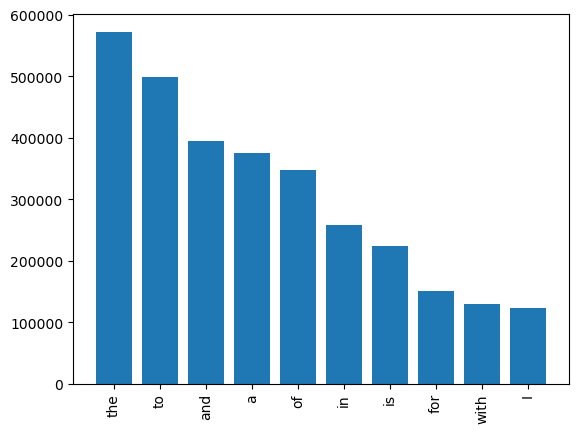

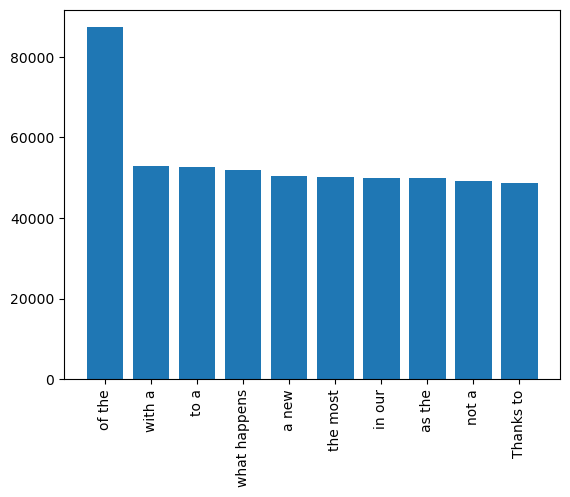

In [7]:
from nltk.util import ngrams
from nltk.util import bigrams
from nltk.lm import NgramCounter


text_bigrams = [ngrams(sent.split(), 2) for sent in tweets["x"]]
text_unigrams = [ngrams(sent.split(), 1) for sent in tweets["x"]]

from collections import Counter

unigram_counter = Counter()
bigram_counter = Counter()

for sentence in text_unigrams:
    for unigram in sentence:
        unigram_counter.update(unigram)

for sentence in text_bigrams:
    for bigram in sentence:
        bigram_counter.update([bigram])
most_common_unigrams = unigram_counter.most_common(10)
most_common_bigrams = bigram_counter.most_common(10)
unigrams, unigram_freqeuncies = list(zip(*most_common_unigrams))
bigrams, bigram_freqeuncies = list(zip(*most_common_bigrams))
bigrams = [" ".join(bigram) for bigram in bigrams]
import matplotlib.pyplot as plt
plt.bar(unigrams, unigram_freqeuncies)
plt.xticks(rotation=90)
plt.show()
plt.bar(bigrams, bigram_freqeuncies)
plt.xticks(rotation=90)
plt.show()

### Processing tweets

In [6]:
import copy
unprocessed_tweets = copy.deepcopy(tweets)

In [7]:
preprocess(tweets, flags={'to_lower': True, 'remove_punctuation': True, 'simplify_haha': True, 'tokenize': True, 'replace_abbreviations': True, 'replace_emoticons': True, 'replace_user_handles': True, 'remove_stopwords': True, 'lemmatize': True, 'remove_single_symbols': True, 'spelling_correction': False, 'replace_urls': True})

# Plotting processed data

In [ ]:
def plot_most_commmon_uni_and_bigrams(tweets):
    text_bigrams = [ngrams(sent, 2) for sent in tweets["x"]]
    text_unigrams = [ngrams(sent, 1) for sent in tweets["x"]]

    unigram_counter = Counter()
    bigram_counter = Counter()

    for sentence in text_unigrams:
        for unigram in sentence:
            unigram_counter.update(unigram)

    for sentence in text_bigrams:
        for bigram in sentence:
            bigram_counter.update([bigram])

    most_common_unigrams = unigram_counter.most_common(10)
    most_common_bigrams = bigram_counter.most_common(10)

    unigrams, unigram_freqeuncies = list(zip(*most_common_unigrams))
    bigrams, bigram_freqeuncies = list(zip(*most_common_bigrams))
    bigrams = [" ".join(bigram) for bigram in bigrams]

    plt.bar(unigrams, unigram_freqeuncies)
    plt.xticks(rotation=90)
    plt.show()
    plt.bar(bigrams, bigram_freqeuncies)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
plot_most_commmon_uni_and_bigrams(tweets)

In [ ]:
positive_1_tweets = tweets[tweets['pos']=='1']
positive_2_tweets = tweets[tweets['pos']=='2']
positive_3_tweets = tweets[tweets['pos']=='3']
positive_4_tweets = tweets[tweets['pos']=='4']
positive_5_tweets = tweets[tweets['pos']=='5']

negative_1_tweets = tweets[tweets['neg']=='-1']
negative_2_tweets = tweets[tweets['neg']=='-2']
negative_3_tweets = tweets[tweets['neg']=='-3']
negative_4_tweets = tweets[tweets['neg']=='-4']
negative_5_tweets = tweets[tweets['neg']=='-5']

In [ ]:
plot_most_commmon_uni_and_bigrams(negative_1_tweets)

### Finding distirbutions of positive and negative labels

In [14]:
import matplotlib.pyplot as plt

In [ ]:
positive_counter = Counter()
negative_counter = Counter()

for i, row in tweets.iterrows():
    if row['pos'] not in [1,2,3,4,5,'1','2','3','4','5']:
        print(row['Sentiment'])
    positive_counter.update([int(row['pos'])])
    negative_counter.update([int(row['neg'])])


<BarContainer object of 5 artists>

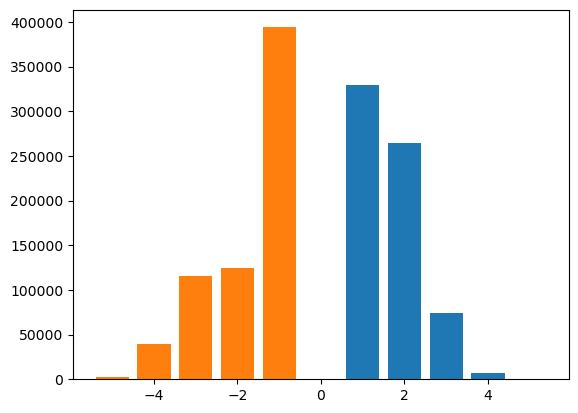

In [15]:

plt.bar(list(positive_counter.keys()), list(positive_counter.values()))
plt.bar(list(negative_counter.keys()), list(negative_counter.values()))

Dataset highly imbalanced in regards to the labels.
Metrics - area under ROC curve, area under PR curve, accuracy

Stratify tweets by date, location, pos and neg

In [8]:
from sklearn.model_selection import train_test_split
def split_data(tweets):
    train_tweets, test_tweets, train_pos, test_pos, train_neg, test_neg, _, test_strat = train_test_split(tweets['x'], tweets['pos'], tweets['neg'], tweets['strat'], test_size=0.2, random_state=0, stratify=tweets[['strat']])
    val_tweets, test_tweets, val_pos, test_pos, val_neg, test_neg = train_test_split(test_tweets, test_pos, test_neg, test_size=0.5, random_state=0, stratify=test_strat)
    return train_tweets, val_tweets, test_tweets, train_pos, val_pos, test_pos, train_neg, val_neg, test_neg

# Part 2


### VADER

vader - removing emoticons and replacing slang is not necessarily necessary, removing punctuation could even reduce performance, capitalization as well

In [12]:
vader_tweets = copy.deepcopy(unprocessed_tweets)
preprocess(vader_tweets, flags={'to_lower': False, 'remove_punctuation': False, 'simplify_haha': False, 'tokenize': False, 'replace_abbreviations': False, 'replace_emoticons': False, 'remove_tag_tokens': False, 'remove_stopwords': False, 'lemmatize': False, 'remove_single_symbols': False, 'spelling_correction': False})

In [16]:
train_tweets, val_tweets, test_tweets, train_pos, val_pos, test_pos, train_neg, val_neg, test_neg = split_data(vader_tweets)

In [52]:
from tqdm import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
inferred_pos = []
inferred_neg = []
for tweet in tqdm(test_tweets):
    scores = analyzer.polarity_scores(tweet)
    inferred_pos.append(scores['pos'])
    inferred_neg.append(scores['neg'])
    #normalising scores so that they are in range 1-5 and -1 to -5
    inferred_pos[-1] = int(round(inferred_pos[-1]*4)) + 1
    inferred_neg[-1] = int(round(inferred_neg[-1]*-4)) - 1


100%|██████████| 67537/67537 [00:08<00:00, 8262.81it/s]


In [69]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
def evaluate_model(true_pos, true_neg, inferred_pos, inferred_neg):
    print("Accuracy_pos: ", accuracy_score(true_pos, inferred_pos))
    print("Accuracy_neg: ", accuracy_score(true_neg, inferred_neg))
    print("F1_pos: ", f1_score(true_pos, inferred_pos, average='weighted'))
    print("F1_neg: ", f1_score(true_neg, inferred_neg, average='weighted'))
    inferred_pos_oh = pd.get_dummies(inferred_pos)
    inferred_neg_oh = pd.get_dummies(inferred_neg)
    print("AUC_pos: ", roc_auc_score(true_pos, inferred_pos_oh, multi_class='ovr', average='weighted'))
    print("AUC_neg: ", roc_auc_score(true_neg, inferred_neg_oh, multi_class='ovr', average='weighted'))

In [70]:
test_pos = test_pos.astype(int)
test_neg = test_neg.astype(int)
evaluate_model(list(test_pos), list(test_neg), inferred_pos, inferred_neg)

Accuracy_pos:  0.6871936864237381
Accuracy_neg:  0.5579015946814339
F1_pos:  0.6562900882173108
F1_neg:  0.4876780369944956
AUC_pos:  0.7245444284054979
AUC_neg:  0.5754309935174419


## Embeddings

### Bag of words

In [9]:
train_tweets, val_tweets, test_tweets, train_pos, val_pos, test_pos, train_neg, val_neg, test_neg = split_data(tweets)

In [10]:
len(train_tweets), len(val_tweets), len(test_tweets)

(540296, 67537, 67537)

In [11]:
word_counter = Counter()

for tweet in list(train_tweets) + list(val_tweets):
    for word in tweet:
        word_counter.update([word])


In [43]:

#words with more than 15 occurences
vocab = [word for word, count in word_counter.items() if count > 5]
print(len(vocab))
vocab.append('UNK')

51056


In [44]:
def bow_encode(tweet, vocab):
    encoded = [0]*len(vocab)
    for word in tweet:
        if word in vocab:
            encoded[vocab.index(word)] += 1
        else:
            encoded[-1] += 1
    return encoded

### TF-IDF

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=len(vocab))
vectorizer.fit_transform([" ".join(tweet) for tweet in train_tweets]+[" ".join(tweet) for tweet in val_tweets])

<607833x51057 sparse matrix of type '<class 'numpy.float64'>'
	with 8710991 stored elements in Compressed Sparse Row format>

In [ ]:

encoded_train_tweets = vectorizer.transform([" ".join(tweet) for tweet in train_tweets])
encoded_val_tweets = vectorizer.transform([" ".join(tweet) for tweet in val_tweets])
encoded_test_tweets = vectorizer.transform([" ".join(tweet) for tweet in test_tweets])

### Word2Vec

went with skip-gram, can better represent rare words, works well with small datasets (according to paper authors)

In [107]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(list(train_tweets) + list(val_tweets), min_count=2, workers=8, sg=1)

In [116]:
len(w2v_model.wv['vaccine'])

100

### GloVe

In [113]:
import csv
import numpy as np
def glove2dict(glove_filename):
    with open(glove_filename, encoding='utf-8') as f:
        reader = csv.reader(f, delimiter=' ', quoting=csv.QUOTE_NONE)
        embed = {line[0]: np.array(list(map(float, line[1:])))
                    for line in reader}
    return embed

In [114]:
glove_dictionary = glove2dict('glove.twitter.27B.200d.txt')

In [ ]:
glove_dictionary['vaccine']

### FastText

In [120]:
from gensim.models import FastText
fasttext_model = FastText(list(train_tweets) + list(val_tweets), min_count=2, workers=8, sg=1, epochs=15)

In [123]:
fasttext_model.wv["vaccine"]

array([ 0.01966258,  0.2165658 ,  0.21393049, -0.33521083,  0.04722314,
       -0.6253451 ,  0.3224923 , -0.06939656,  1.3086256 ,  0.5916107 ,
       -0.25102094,  0.24471909,  0.13292168, -0.11070154, -0.3331309 ,
       -0.15074897,  0.12743294, -0.33723003,  0.12242357, -0.23034333,
       -0.23550189,  0.53598464, -0.49103132,  0.06963629,  0.14073634,
        0.05840749, -0.29320297,  0.59921736,  0.53837156,  0.32364944,
        0.5677848 ,  0.41210437, -0.4599703 ,  0.15437725,  0.33981484,
       -0.7631823 , -0.05337827, -0.81435853, -0.27119678, -0.28423256,
       -0.2758534 , -0.61655027,  0.02685743, -0.47242874, -1.0156314 ,
       -0.66716844,  0.67307454,  0.3268877 , -0.72639084,  0.8979473 ,
        0.24669813, -0.02895155,  0.4400408 , -0.3026672 ,  0.3421758 ,
        0.18958321, -0.14329354, -0.53972614, -0.07128329,  1.0839355 ,
        0.0232219 , -0.85382605, -0.36922273, -0.13533896, -0.85011035,
        0.04102843,  0.34789544,  0.9195639 , -0.09619165, -0.09

## Umap visualisations

In [15]:
import umap
import umap.plot

/home/lrabuzin/.conda/envs/genomics/lib/python3.10/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [27]:
non_test_tweets = list(val_tweets)
non_test_pos = list(val_pos)
non_test_neg = list(val_neg)

vaccine_tweets = [1 if 'vaccine' in tweet else 0 for tweet in non_test_tweets]
hydroxychloroquine_tweets = [1 if 'hydroxychloroquine' in tweet else 0 for tweet in non_test_tweets]
lockdown_tweets = [1 if 'lockdown' in tweet else 0 for tweet in non_test_tweets]
covid_tweets = [1 if 'covid' in tweet else 0 for tweet in non_test_tweets]
pfizer_tweets = [1 if 'pfizer' in tweet else 0 for tweet in non_test_tweets]
moderna_tweets = [1 if 'moderna' in tweet else 0 for tweet in non_test_tweets]

#take a subset of the data
_, subset_tweets, _, subset_pos, _, subset_neg, _, subset_vaccine_tweets, _, subset_hydroxychloroquine_tweets, _, subset_lockdown_tweets, _, subset_covid_tweets, _, subset_pfizer_tweets, _, subset_moderna_tweets = train_test_split(non_test_tweets, non_test_pos, non_test_neg, vaccine_tweets, hydroxychloroquine_tweets, lockdown_tweets, covid_tweets, pfizer_tweets, moderna_tweets, test_size=0.05, random_state=42)

In [28]:
len(subset_tweets)

3377

### Bag of words visualisation

In [45]:
import numpy as np

In [46]:
embeddings = []
for tweet in tqdm(subset_tweets):
    embeddings.append(bow_encode(tweet, vocab))


100%|██████████| 3377/3377 [00:43<00:00, 76.81it/s] 


In [47]:
embedding_array = np.array(embeddings)

In [48]:
embedding_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 2],
       [2, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
embedding_array.shape

(3377, 51057)

In [50]:
umap_embedding = umap.UMAP(metric="hellinger", init='random', random_state=42).fit(embedding_array)


/home/lrabuzin/.conda/envs/genomics/lib/python3.10/site-packages/umap/umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 5215418 edges.
It has only fully disconnected 2 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


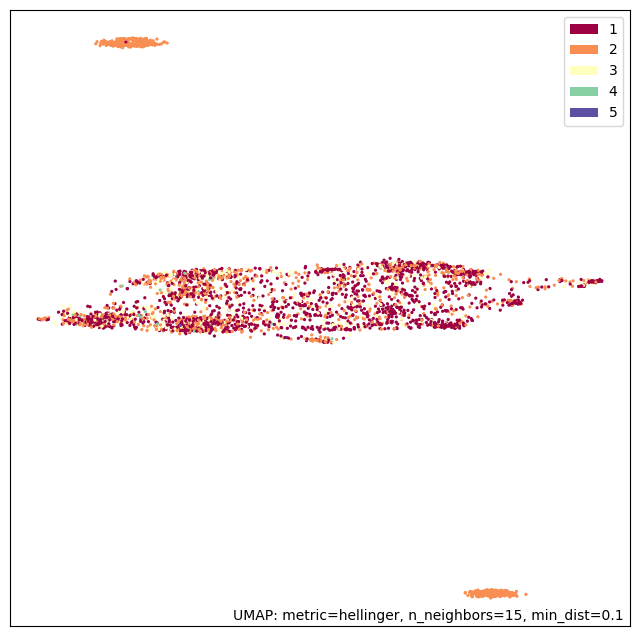

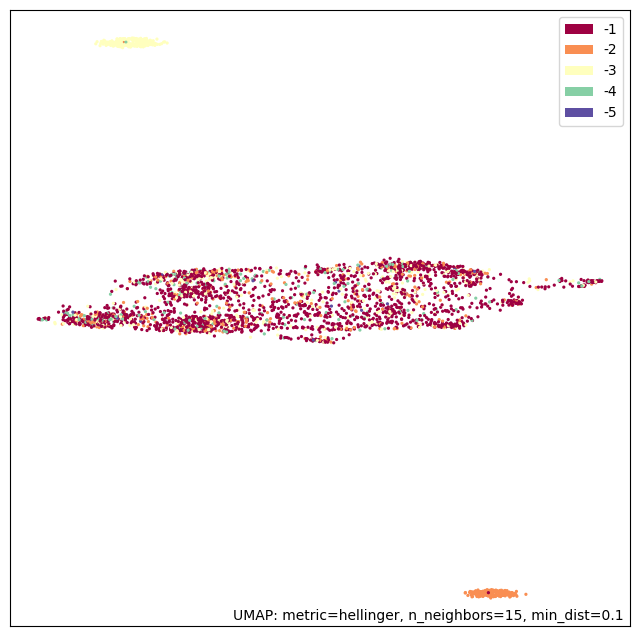

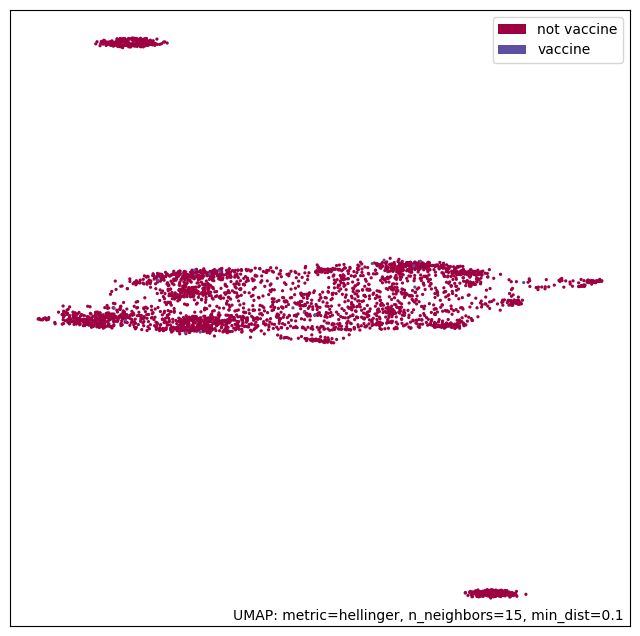

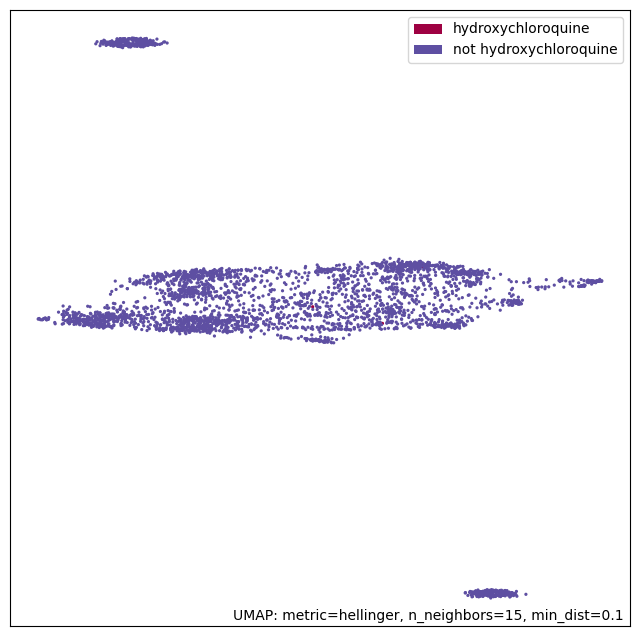

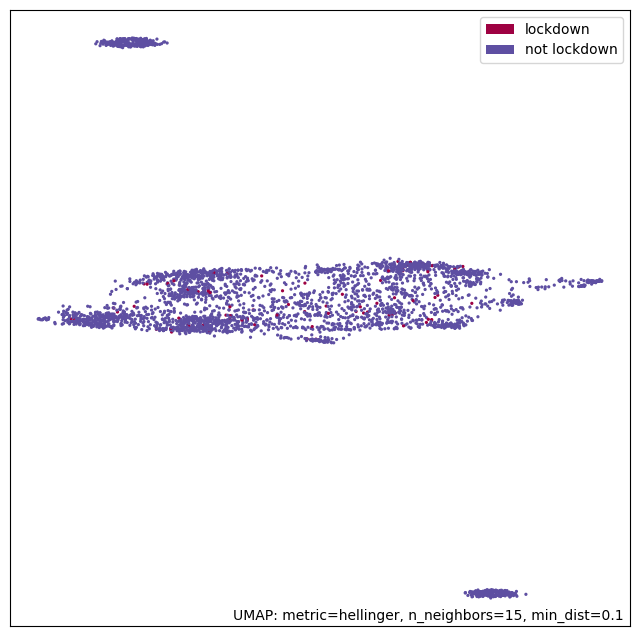

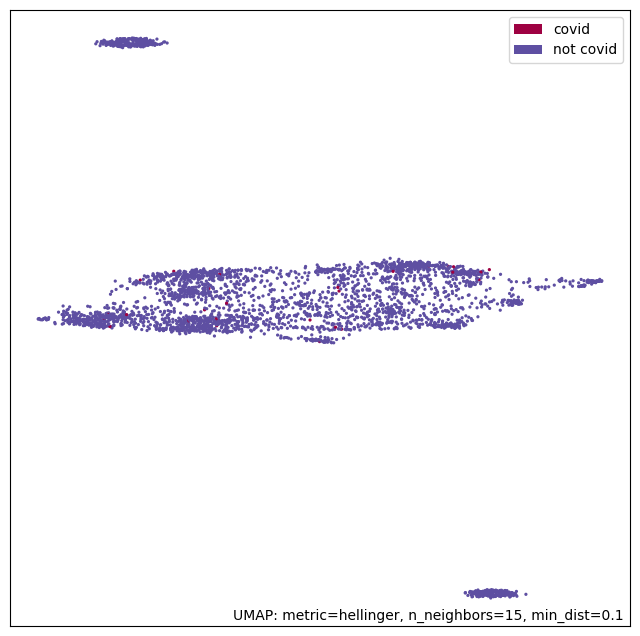

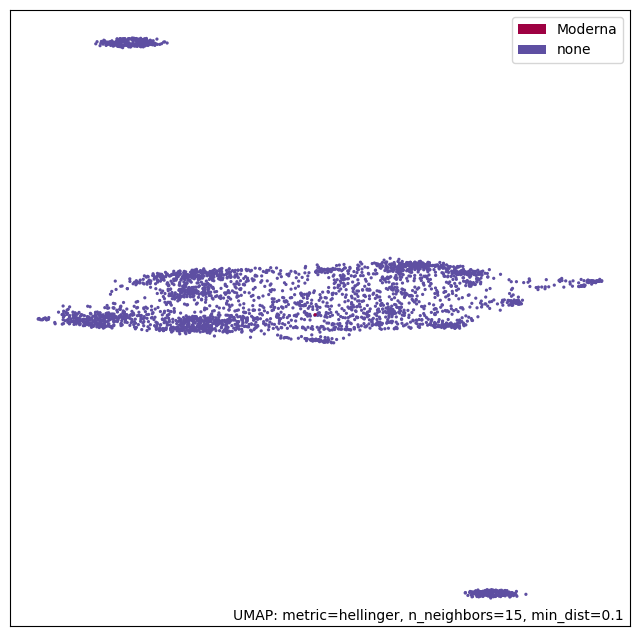

In [51]:
f = umap.plot.points(umap_embedding, labels=np.array(subset_pos))
f = umap.plot.points(umap_embedding, labels=np.array(subset_neg))
vaccine_labels = ['vaccine' if tweet == 1 else 'not vaccine' for tweet in subset_vaccine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_labels))
hydroxychloroquine_labels = ['hydroxychloroquine' if tweet == 1 else 'not hydroxychloroquine' for tweet in subset_hydroxychloroquine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(hydroxychloroquine_labels))
lockdown_labels = ['lockdown' if tweet == 1 else 'not lockdown' for tweet in subset_lockdown_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(lockdown_labels))
covid_labels = ['covid' if tweet == 1 else 'not covid' for tweet in subset_covid_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(covid_labels))
vaccine_manufacturer_labels = ["Pfizer" if tweet[0] == 1 and tweet[1] == 0 else "Moderna" if tweet[0] == 0 and tweet[1] == 1 else "both" if tweet[0] == 1 and tweet[1] == 1 else "none" for tweet in zip(subset_pfizer_tweets, subset_moderna_tweets)]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_manufacturer_labels))

### TF-IDF visualisation

In [56]:
embeddings = vectorizer.transform([" ".join(tweet) for tweet in subset_tweets])

In [59]:
umap_embedding = umap.UMAP(metric="hellinger", init='random', random_state=42).fit(embeddings)

/home/lrabuzin/.conda/envs/genomics/lib/python3.10/site-packages/umap/umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 6397392 edges.
It has only fully disconnected 1 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


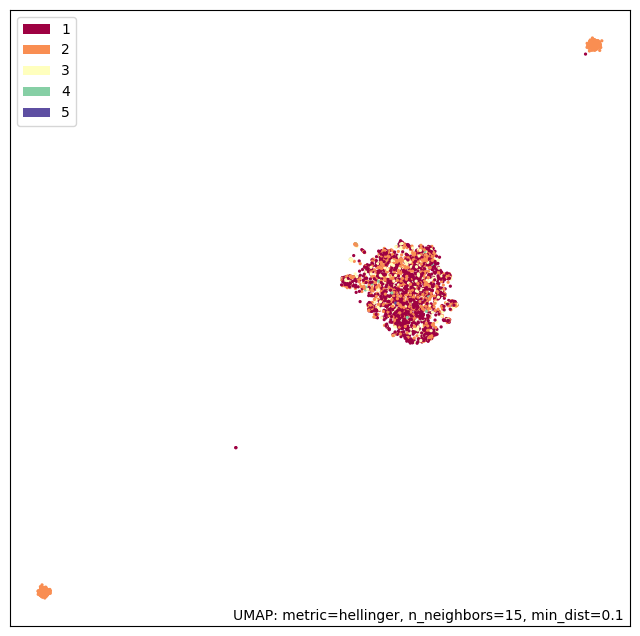

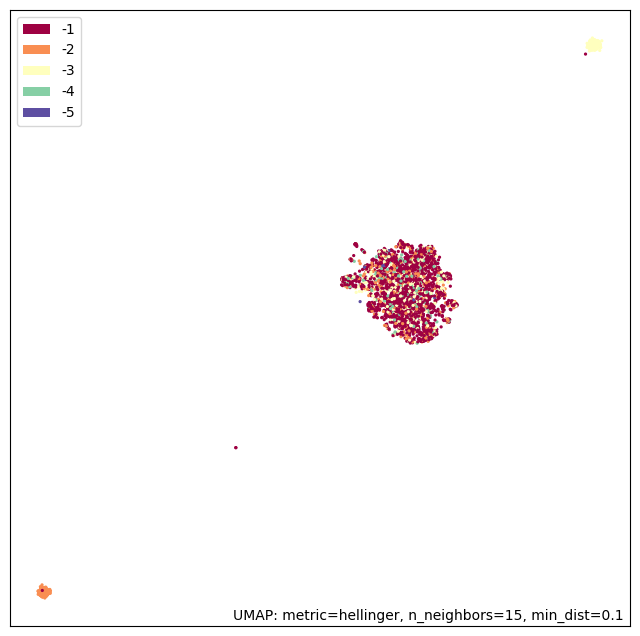

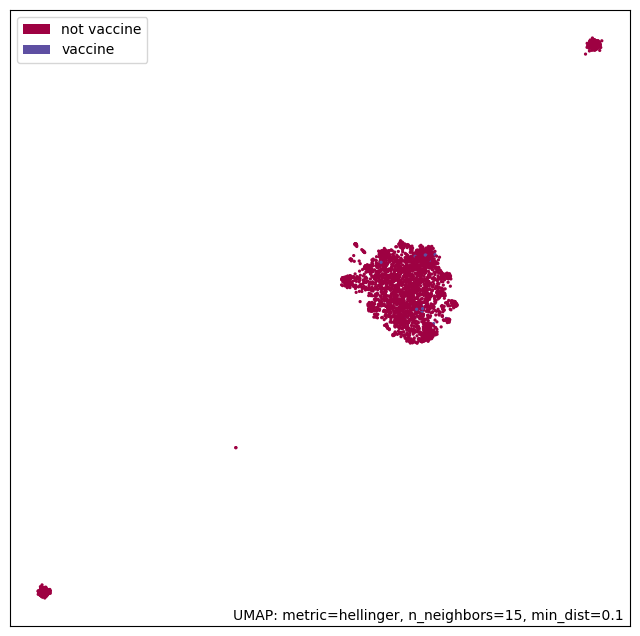

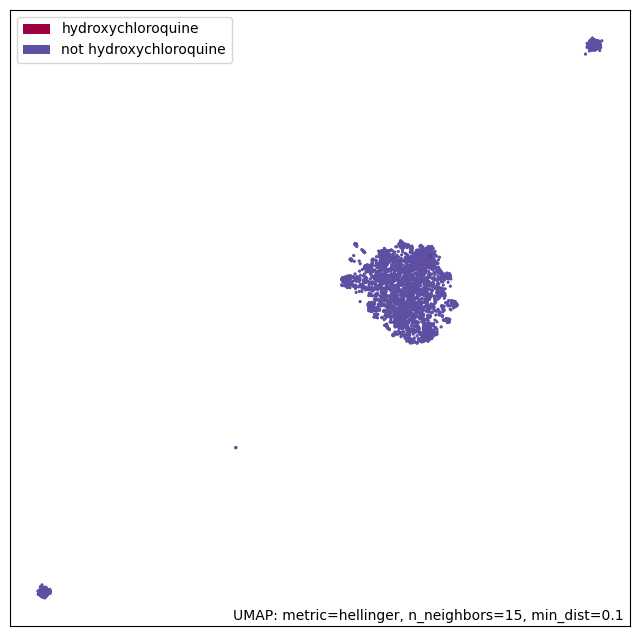

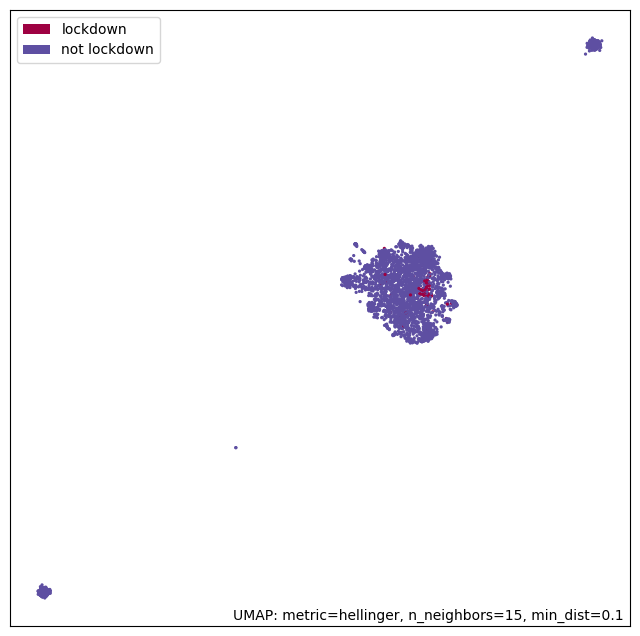

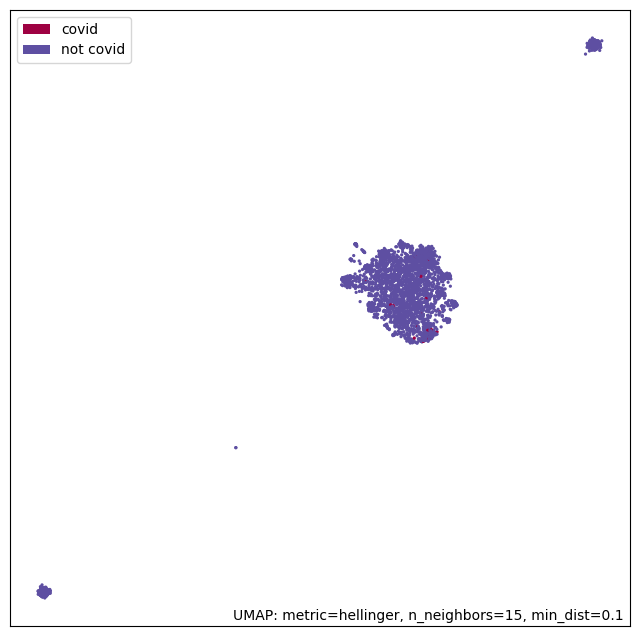

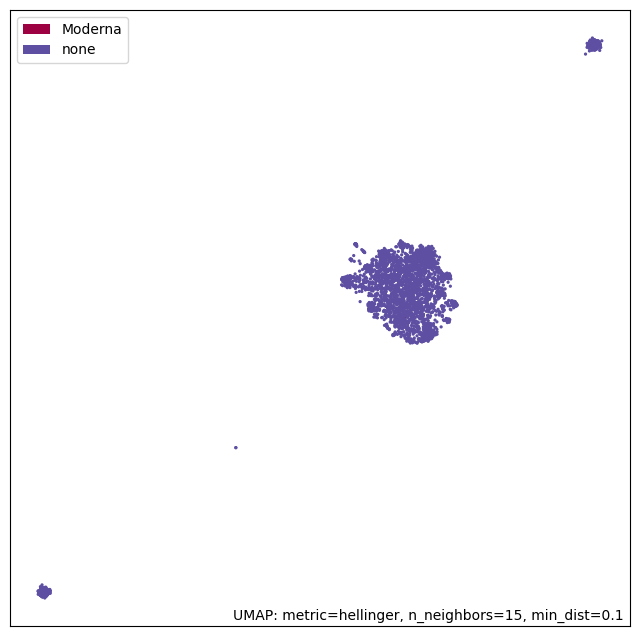

In [60]:
f = umap.plot.points(umap_embedding, labels=np.array(subset_pos))
f = umap.plot.points(umap_embedding, labels=np.array(subset_neg))
vaccine_labels = ['vaccine' if tweet == 1 else 'not vaccine' for tweet in subset_vaccine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_labels))
hydroxychloroquine_labels = ['hydroxychloroquine' if tweet == 1 else 'not hydroxychloroquine' for tweet in subset_hydroxychloroquine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(hydroxychloroquine_labels))
lockdown_labels = ['lockdown' if tweet == 1 else 'not lockdown' for tweet in subset_lockdown_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(lockdown_labels))
covid_labels = ['covid' if tweet == 1 else 'not covid' for tweet in subset_covid_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(covid_labels))
vaccine_manufacturer_labels = ["Pfizer" if tweet[0] == 1 and tweet[1] == 0 else "Moderna" if tweet[0] == 0 and tweet[1] == 1 else "both" if tweet[0] == 1 and tweet[1] == 1 else "none" for tweet in zip(subset_pfizer_tweets, subset_moderna_tweets)]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_manufacturer_labels))

### Word2Vec visualization

In [61]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(list(train_tweets) + list(val_tweets), min_count=2, workers=8, sg=1)

True

In [65]:
embeddings = []
for tweet in tqdm(subset_tweets):
    word_embeddings = []
    for word in tweet:
        word_embeddings.append(w2v_model.wv[word] if word in w2v_model.wv else np.zeros(100))
    word_embeddings = np.array(word_embeddings)
    embeddings.append(np.mean(word_embeddings, axis=0))

100%|██████████| 3377/3377 [00:00<00:00, 17113.90it/s]


In [66]:
embedding_array = np.array(embeddings)

In [68]:
umap_embedding = umap.UMAP(init='random', random_state=42).fit(embedding_array)

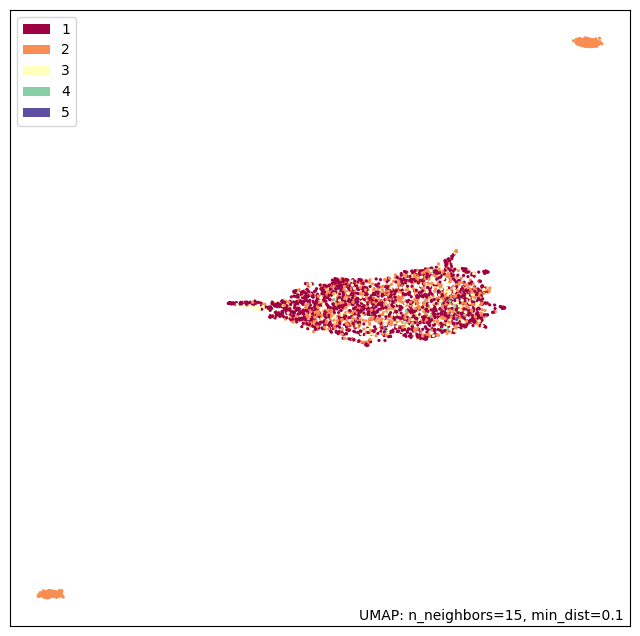

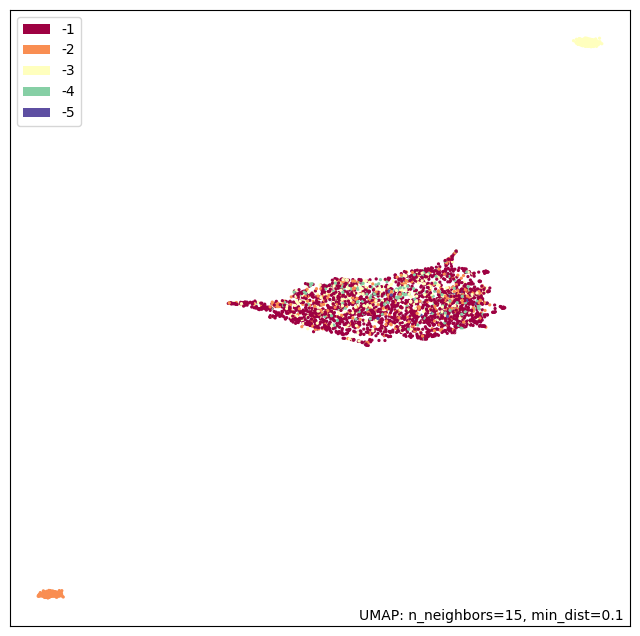

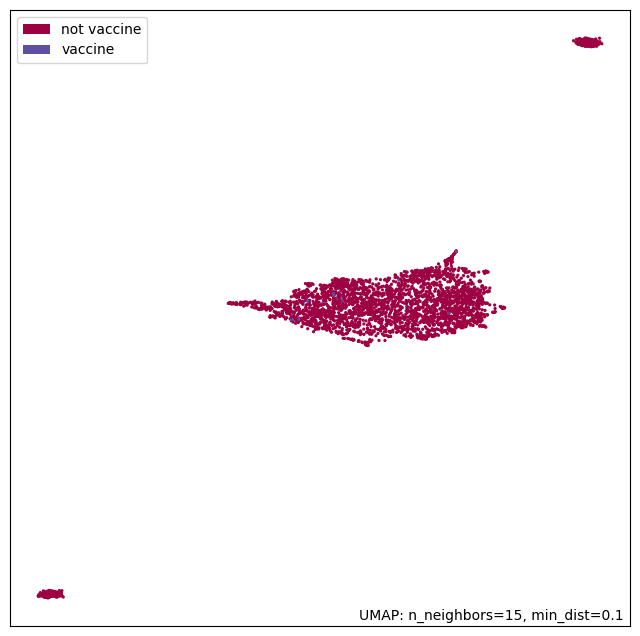

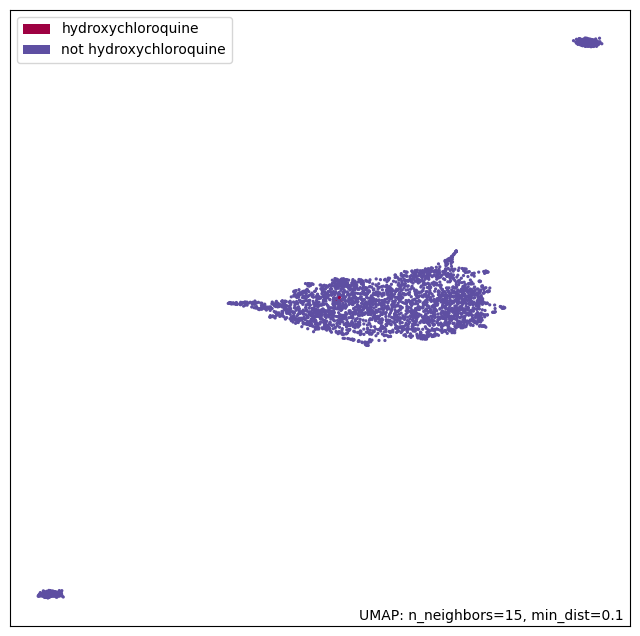

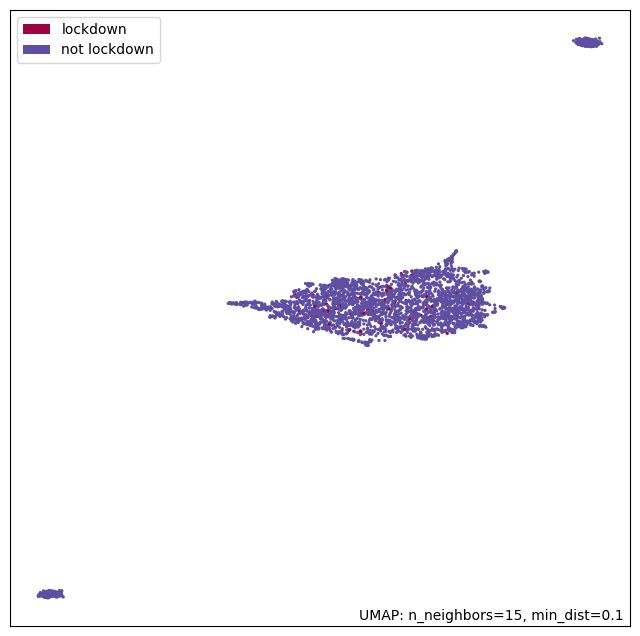

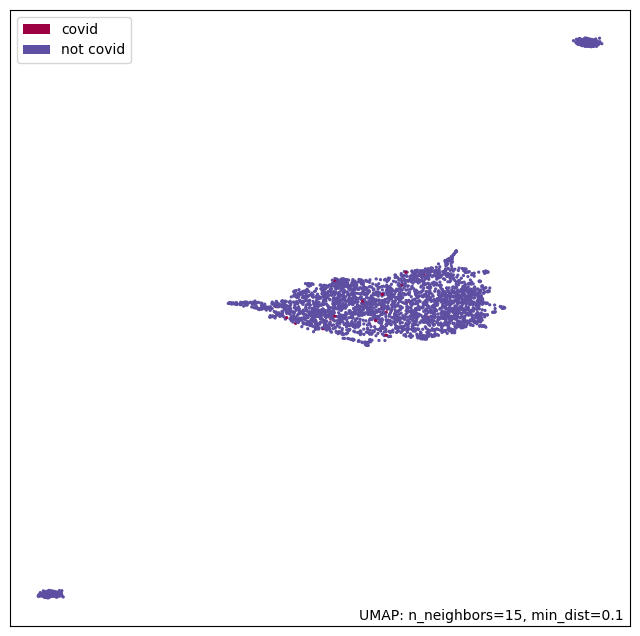

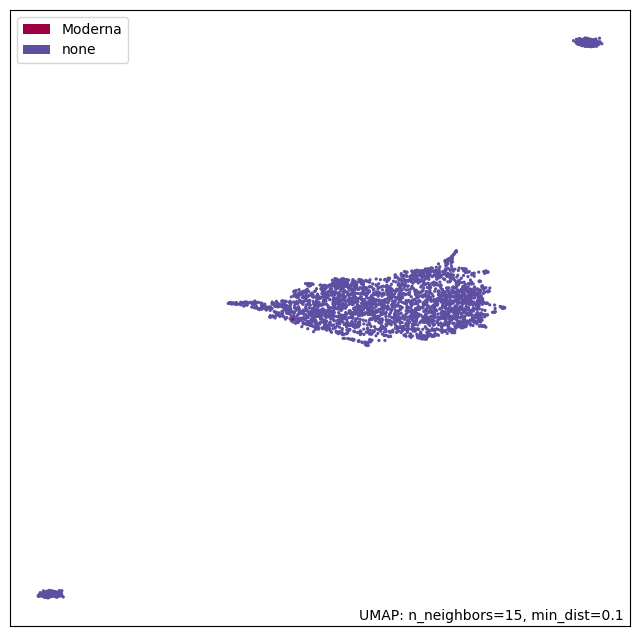

In [69]:
f = umap.plot.points(umap_embedding, labels=np.array(subset_pos))
f = umap.plot.points(umap_embedding, labels=np.array(subset_neg))
vaccine_labels = ['vaccine' if tweet == 1 else 'not vaccine' for tweet in subset_vaccine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_labels))
hydroxychloroquine_labels = ['hydroxychloroquine' if tweet == 1 else 'not hydroxychloroquine' for tweet in subset_hydroxychloroquine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(hydroxychloroquine_labels))
lockdown_labels = ['lockdown' if tweet == 1 else 'not lockdown' for tweet in subset_lockdown_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(lockdown_labels))
covid_labels = ['covid' if tweet == 1 else 'not covid' for tweet in subset_covid_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(covid_labels))
vaccine_manufacturer_labels = ["Pfizer" if tweet[0] == 1 and tweet[1] == 0 else "Moderna" if tweet[0] == 0 and tweet[1] == 1 else "both" if tweet[0] == 1 and tweet[1] == 1 else "none" for tweet in zip(subset_pfizer_tweets, subset_moderna_tweets)]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_manufacturer_labels))

### GloVe visualisation

In [70]:
import csv
import numpy as np
def glove2dict(glove_filename):
    with open(glove_filename, encoding='utf-8') as f:
        reader = csv.reader(f, delimiter=' ', quoting=csv.QUOTE_NONE)
        embed = {line[0]: np.array(list(map(float, line[1:])))
                    for line in reader}
    return embed

In [71]:
glove_dictionary = glove2dict('glove.twitter.27B.200d.txt')

In [72]:
embeddings = []
for tweet in tqdm(subset_tweets):
    word_embeddings = []
    for word in tweet:
        word_embeddings.append(glove_dictionary.get(word, np.zeros(200)))
    word_embeddings = np.array(word_embeddings)
    embeddings.append(np.mean(word_embeddings, axis=0))

100%|██████████| 3377/3377 [00:00<00:00, 18139.16it/s]


In [73]:
embedding_array = np.array(embeddings)
umap_embedding = umap.UMAP(init='random', random_state=42).fit(embedding_array)
f = umap.plot.points(umap_embedding, labels=np.array(subset_pos))
f = umap.plot.points(umap_embedding, labels=np.array(subset_neg))
vaccine_labels = ['vaccine' if tweet == 1 else 'not vaccine' for tweet in subset_vaccine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_labels))
hydroxychloroquine_labels = ['hydroxychloroquine' if tweet == 1 else 'not hydroxychloroquine' for tweet in subset_hydroxychloroquine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(hydroxychloroquine_labels))
lockdown_labels = ['lockdown' if tweet == 1 else 'not lockdown' for tweet in subset_lockdown_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(lockdown_labels))
covid_labels = ['covid' if tweet == 1 else 'not covid' for tweet in subset_covid_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(covid_labels))
vaccine_manufacturer_labels = ["Pfizer" if tweet[0] == 1 and tweet[1] == 0 else "Moderna" if tweet[0] == 0 and tweet[1] == 1 else "both" if tweet[0] == 1 and tweet[1] == 1 else "none" for tweet in zip(subset_pfizer_tweets, subset_moderna_tweets)]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_manufacturer_labels))

### FastText visualisation

In [82]:
from gensim.models import FastText
fasttext_model = FastText(list(train_tweets) + list(val_tweets), min_count=2, workers=8, sg=1, epochs=15)

In [83]:
embeddings = []
for tweet in tqdm(subset_tweets):
    word_embeddings = []
    for word in tweet:
        word_embeddings.append(fasttext_model.wv[word] if word in fasttext_model.wv else np.zeros(100))
    word_embeddings = np.array(word_embeddings)
    embeddings.append(np.mean(word_embeddings, axis=0))

100%|██████████| 3377/3377 [00:00<00:00, 12516.75it/s]


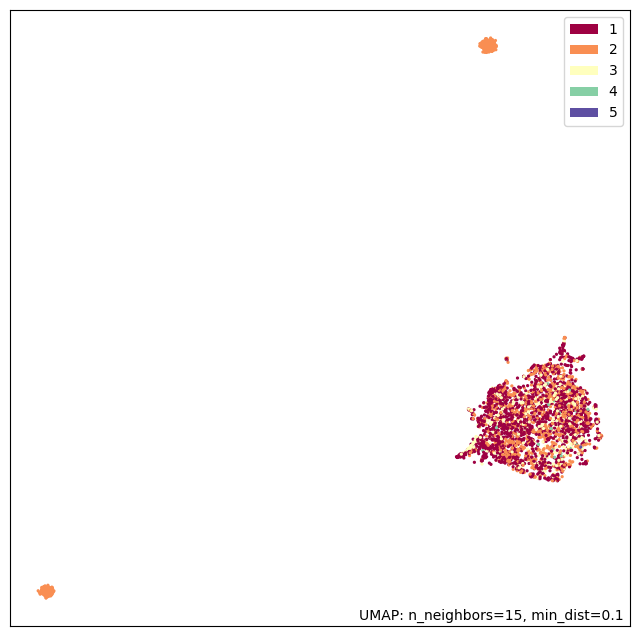

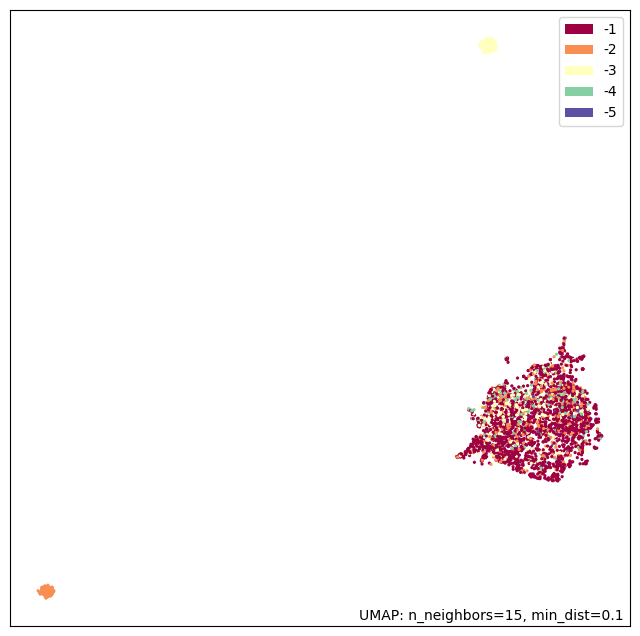

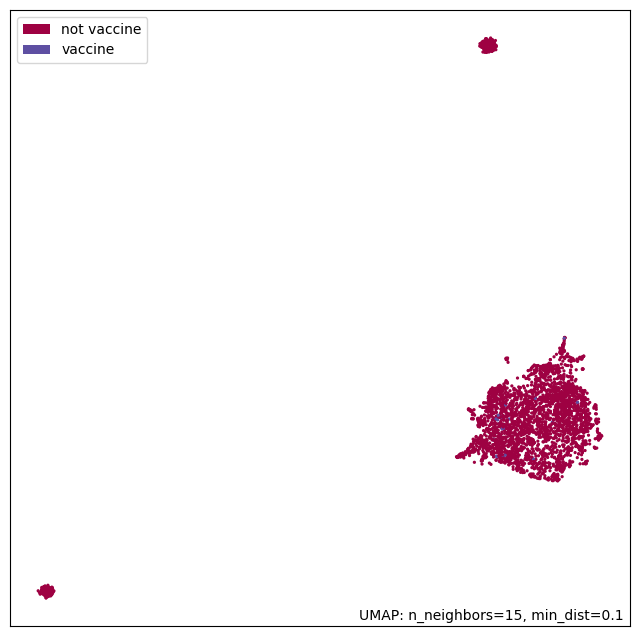

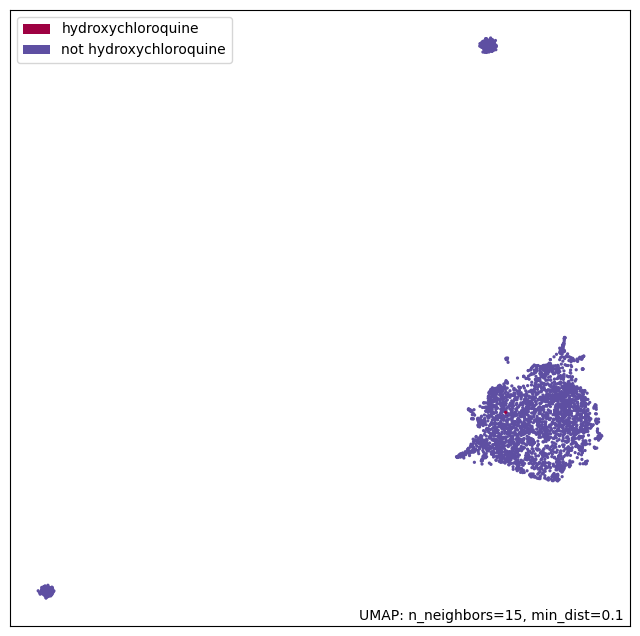

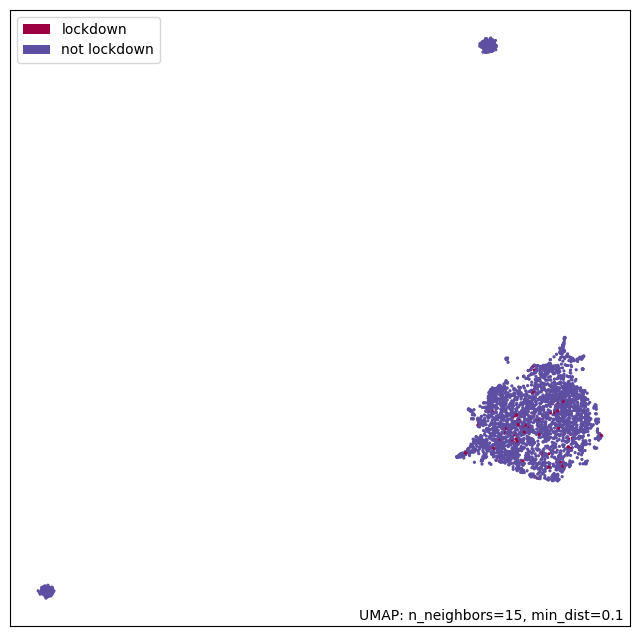

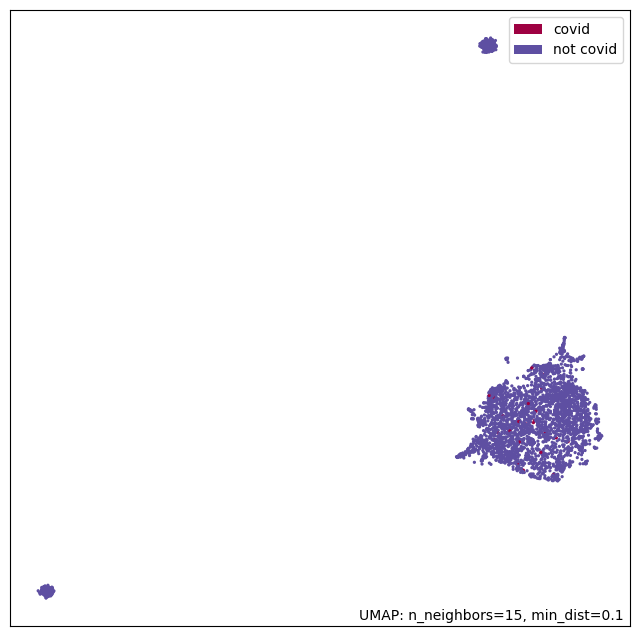

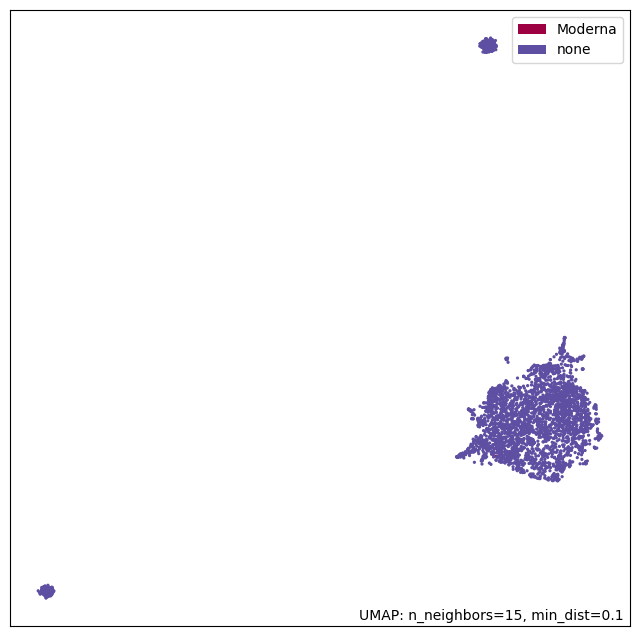

In [84]:
embedding_array = np.array(embeddings)
umap_embedding = umap.UMAP(init='random', random_state=42).fit(embedding_array)
f = umap.plot.points(umap_embedding, labels=np.array(subset_pos))
f = umap.plot.points(umap_embedding, labels=np.array(subset_neg))
vaccine_labels = ['vaccine' if tweet == 1 else 'not vaccine' for tweet in subset_vaccine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_labels))
hydroxychloroquine_labels = ['hydroxychloroquine' if tweet == 1 else 'not hydroxychloroquine' for tweet in subset_hydroxychloroquine_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(hydroxychloroquine_labels))
lockdown_labels = ['lockdown' if tweet == 1 else 'not lockdown' for tweet in subset_lockdown_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(lockdown_labels))
covid_labels = ['covid' if tweet == 1 else 'not covid' for tweet in subset_covid_tweets]
f = umap.plot.points(umap_embedding, labels=np.array(covid_labels))
vaccine_manufacturer_labels = ["Pfizer" if tweet[0] == 1 and tweet[1] == 0 else "Moderna" if tweet[0] == 0 and tweet[1] == 1 else "both" if tweet[0] == 1 and tweet[1] == 1 else "none" for tweet in zip(subset_pfizer_tweets, subset_moderna_tweets)]
f = umap.plot.points(umap_embedding, labels=np.array(vaccine_manufacturer_labels))

## Tweet embeddings

1. Mean of all word embeddings in the tweet
2. Sum of all word embeddings normalised to have length one
3. Tf-idf weighted mean

## Classifiers

1. SVM
2. MLP
3. BiLSTM